**PSO FUNCTION**

In [ ]:
import math
import random

def flatten(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

def unflatten(flat_list, structure):
    flat_iter = iter(flat_list)
    def helper(struct):
        result = []
        for elem in struct:
            if isinstance(elem, list):
                result.append(helper(elem))
            else:
                result.append(next(flat_iter))
        return result
    return helper(structure)

def pso_function(parameter_values, bounds, n_particles, m_iterations, inertia, cognitive, social):

    print("PSO Algorithm Started")

    num_particles = n_particles
    max_iterations = m_iterations
    w = inertia  # inertia weight
    c1 = cognitive  # cognitive constant
    c2 = social  # social constant

    para = flatten(parameter_values)
    len_para = len(para)
    update_bounds = flatten(bounds)


    particles = []
    velocities = []
    pbest = []
    gbest = None
    gbest_value = -float('inf')
    iteration_best_values = []

    for _ in range(num_particles):
        particle = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len_para)]
        temp_con = unflatten(particle, parameter_values)
        while (conditions(temp_con) == False):
            particle = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len_para)]
            temp_con = unflatten(particle, parameter_values)
        particles.append(particle)
        velocities.append([0] * (len_para))
        pbest.append(particle[:])

    # PSO loop
    for iter in range(max_iterations):
        iteration_best_value = -float('inf')
        for i in range(num_particles):
            current_position = particles[i]
            temp = unflatten(current_position, parameter_values)
            fitness = objective_function(temp)

            # Update personal best
            temp = unflatten(pbest[i], parameter_values)
            if fitness > objective_function(temp):
                pbest[i] = current_position[:]

            # Update global best
            if fitness > gbest_value:
                gbest = current_position[:]
                gbest_value = fitness

            # Update iteration best value
            if fitness > iteration_best_value:
                iteration_best_value = fitness

        # Record the best value found in this iteration
        iteration_best_values.append(iteration_best_value)

        # Update velocities and particles
        for i in range(num_particles):
            for j in range(len_para):
                new_velocity = (w * velocities[i][j] +
                                    c1 * random.random() * (pbest[i][j] - particles[i][j]) +
                                    c2 * random.random() * (gbest[j] - particles[i][j]))
                new_position = particles[i][j] + new_velocity

                new_position = max(min(new_position, update_bounds[j][1]), update_bounds[j][0])

                # Update only if the new position satisfies the condition
                particles[i][j] = new_position
                velocities[i][j] = new_velocity

                temp_con = unflatten(particles[i], parameter_values)
                if not conditions(temp_con):
                    particles[i][j] -= new_velocity
                    velocities[i][j] = 0
        #Printing
        if (iter % 100 == 0) or iter == (max_iterations-1):
                print(f"Iteration {iter}: Value = {iteration_best_values[iter]}")

    return iteration_best_values

**MAIN PROGRAM**

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Initialize simulation parameters

In [13]:
M = 1  # No. of antennas on BS
N = 8  # No. IRS elements
K = 1  # No.of transmit antennas at the relay device
K_dash = 1 # No. of transmit antennas at the redcap (IoT) device
q = 1 # No. of Quantization bits. 1,2,..., Q
m = 1 # m=1,2,..., 2^n-1

####################### Reflection co-efficient matrix for IRS_1 (I1) #########################
zeta_I1 = [random.uniform(0, 1) for _ in range(N)]
theta_I1 = [random.uniform(0, 2*math.pi*m/2**q) for _ in range(N)]

### Only one phase coefficient matrix is assumed as it is NOT STAR IRS ###
phi_I1_value = [math.sqrt(zeta) * math.exp(theta) for zeta, theta in zip(zeta_I1, theta_I1)]

### Generate a complex matrix ###
phi_I1 = np.zeros((N, N), dtype=complex)
np.fill_diagonal(phi_I1, phi_I1_value)

####################### Reflection co-efficient matrix for IRS_2 (I2) #########################
zeta_I2 = [random.uniform(0, 1) for _ in range(N)]
theta_I2 = [random.uniform(0, 2*math.pi*m/2**q) for _ in range(N)]

### Only one phase coefficient matrix is assumed as it is NOT STAR IRS ###
phi_I2_value = [math.sqrt(zeta) * math.exp(theta) for zeta, theta in zip(zeta_I2, theta_I2)]

### Generate a complex matrix ###
phi_I2 = np.zeros((N, N), dtype=complex)
np.fill_diagonal(phi_I2, phi_I2_value)

####################### Reflection co-efficient matrix for IRS_B (IB) #########################
zeta_IB = [random.uniform(0, 1) for _ in range(N)]
theta_IB = [random.uniform(0, 2*math.pi*m/2**q) for _ in range(N)]

### Only one phase coefficient matrix is assumed as it is NOT STAR IRS ###
phi_IB_value = [math.sqrt(zeta) * math.exp(theta) for zeta, theta in zip(zeta_IB, theta_IB)]

### Generate a complex matrix ###
phi_IB = np.zeros((N, N), dtype=complex)
np.fill_diagonal(phi_IB, phi_IB_value)

#### Initialize PSO parameters ####
n_particles = 30
m_iterations = 200
inertia= 0.5
cognitive = 0.5
social = 0.5

### Bounds ###
#TODO: Check what is the formula
bounds = [(0,1)]*(2*M+1)+[(0,1)]*K+[(0,1)]*N+[(0,2*math.pi)]*(2*N)

### Rate Thresholds ###
R_11_th = R_12_th = R_21_th = R_22_th = 0.05

### Power Thresholds ###
P_11_max = P_12_max = P_21_max = P_22_max = 10**(9/10)

### Distance (in m) ###
D_11_I1 = 20
D_12_I1 = 30
D_21_I2 = 15
D_22_I2 = 21
D_1_IB = 5
D_2_IB = 9
D_I1_1 = 4
D_I2_2 = 4
D_IB_B = 10

### Noise ###
sigma_1 = 1
sigma_2 = 1
sigma_b = 1




# Parameters to Optimize

In [ ]:
W_0_real = [random.uniform(0, 1) for _ in range(M)]
W_0_imaginary = [random.uniform(0, 1) for _ in range(M)]
P_s0 = [random.uniform(0, 1)]

alpha_K0 = [random.uniform(0, 1)]

zeta_r = [random.uniform(0, 1) for _ in range(N)]
theta_r = [random.uniform(0, 2*math.pi) for _ in range(N)]
theta_t = [random.uniform(0, 2*math.pi) for _ in range(N)]

### Initialize parameters to optimize ###
par = W_0_real, W_0_imaginary, P_s0, alpha_K0, zeta_r, theta_r, theta_t

## Generate Channel with Path Loss

In [11]:
def generate_channel(N, K, path_loss):

    h = (1/np.sqrt(2)) * (np.random.randn(N, K) + 1j * np.random.randn(N, K))
    h_normalized = h / np.linalg.norm(h, axis=0)
    h = path_loss * h_normalized

    return h

## Get Direct Path Loss

In [8]:
def get_pathloss_direct(d):
   ### QUES: Is there an indirect path loss as well? #TODO find any other 3GPP compliant model
   noise = -120
   pl = 32.6 + 36.7 * math.log10(d)
   ### Convert to Transmit SINR ###
   return math.sqrt(10**((- noise - pl) / 10))

In [ ]:
def up_get_ini(alpha_K0, alpha_K_dash0, P_s0, W_0, h_as, h_ak, sigma_k, h_ac, h_sc, sigma_c, K_dash, sigma_k_dash, h_ak_dash, h_sk, h_ik, h_si, h_sk_dash, h_ik_dash, varphi_r, varphi_t):

    SINRKK = 0.0
    SINRKK_dash = 0.0
    SINRCC = 0.0

    k = 0
    k_dash = 0

    SINRKK = (alpha_K0 * P_s0 * (np.abs(h_sk[k][0] + np.dot(np.dot(h_ik[k],varphi_r),h_si).item()))**2) / (P_s0 * (np.abs(h_sk[k][0] + np.dot(np.dot(h_ik[k],varphi_r),h_si).item()))**2 * (alpha_K_dash0) + (np.abs(np.dot(W_0,h_ak[k])))**2 + sigma_k**2)

    SINRCC = (np.abs(np.dot(W_0,h_ac)))**2 / (P_s0 * np.abs(h_sc)**2 + sigma_c**2)

    SINRKK_dash = (alpha_K_dash0 * P_s0 * (np.abs(h_sk_dash[k_dash][0] + np.dot(np.dot(h_ik_dash[k_dash],varphi_t),h_si).item()))**2) / ((np.abs(np.dot(W_0,h_ak_dash[k_dash])))**2 + sigma_k_dash**2)

    rho = 0.01
    P_I =  np.abs(np.dot(W_0,h_as))**2 + (rho**2 * P_s0)

    return SINRCC, SINRKK, SINRKK_dash, P_I

In [15]:
# Ques: Do all IRS have equal number of reflecting elements?
h_11_I1 = generate_channel(1, N, get_pathloss_direct(D_11_I1))
h_12_I1 = generate_channel(1, N, get_pathloss_direct(D_12_I1))
h_I1_1 = generate_channel(N, 1, get_pathloss_direct(D_I1_1))
h_1_IB = generate_channel(1, N, get_pathloss_direct(D_1_IB))

h_21_I2 = generate_channel(1, N, get_pathloss_direct(D_21_I2))
h_22_I2 = generate_channel(1, N, get_pathloss_direct(D_22_I2))
h_I2_2 = generate_channel(N, 1, get_pathloss_direct(D_I2_2))
h_2_IB = generate_channel(1, N, get_pathloss_direct(D_2_IB))

h_IB_B = generate_channel(N, 1, get_pathloss_direct(D_IB_B))

## Ques: When conjugate and when transpose

# h_as= generate_channel(M,1,PL_as);
# h_ac= generate_channel(M,1,PL_ac);
# h_ak= generate_channel(M,K,PL_ak);
# h_ak = h_ak.transpose() #For own Easy
# h_sk = generate_channel(1,K,PL_sk);
# h_sk = np.conjugate(h_sk.transpose())

# h_ik= generate_channel(N,K,PL_ik);
#
# h_ik = np.conjugate(h_ik.transpose())

# h_si= generate_channel(1,N,PL_si);
# h_si = h_si.transpose()

# h_sc= generate_channel(1,1,PL_sc);
# h_ak_dash= generate_channel(M,K_dash,PL_ak_dash);
# h_ak_dash = h_ak_dash.transpose() #For own Easy
# h_sk_dash= generate_channel(1,K_dash,PL_sk_dash);
# h_sk_dash = np.conjugate(h_sk_dash.transpose())
# h_ik_dash= generate_channel(N,K_dash,PL_ik_dash);
# h_ik_dash = np.conjugate(h_ik_dash.transpose())




[[-47.0669107 -83.75615227j  87.32270343-40.06410603j
  -63.29950954+72.27419469j  56.29170149+77.85647995j
  -58.29669164+76.36676548j -30.34573753-91.15658693j
   93.18136822-23.40127651j  16.7180244 +94.60916862j]]


In [ ]:
def get_channel():
  H_1_B, H_2_B, H_11_1, H_12_1, H_21_2, H_22_2 = 0.0
  return H_1_B, H_2_B, H_11_1, H_12_1, H_21_2, H_22_2


In [ ]:
def conditions(para):

    rate_D11, rate_D12, rate_D21, rate_D22 = get_rate()
    H_1_B, H_2_B, H_11_1, H_12_1, H_21_2, H_22_2 = get_channel()

    condition_1 = (rate_D11 >= R_11_th) and (rate_D12 >= R_12_th) and (rate_D21 >= R_21_th) and (rate_D22 >= R_22_th)
    condition_2 = H_1_B > H_2_B
    condition_3 = H_11_1 > H_12_1
    condition_4 = H_21_2 > H_22_2
    condition_5 = #TODO: What to initialize power with?
    condition_6 = #TODO: What to initialize power with?

    if (condition_1 and condition_3 and condition_4 and condition_5 and condition_6):
        return True
    return False

In [ ]:
def get_SINR_vals():
  SINR_D11_R1, SINR_D11_B, SINR_D12_R1, SINR_D12_B, SINR_D21_R2, SINR_D21_R2, SINR_D22_R2, SINR_D22_R = 0.0


  return  SINR_D11_R1, SINR_D11_B, SINR_D12_R1, SINR_D12_B, SINR_D21_R2, SINR_D21_R2, SINR_D22_R2, SINR_D22_R

In [ ]:
def get_rate():
    ### Get SINR ###
    SINR_D11_R1, SINR_D11_B, SINR_D12_R1, SINR_D12_B, SINR_D21_R2, SINR_D21_R2, SINR_D22_R2, SINR_D22_R2 = get_SINR_vals()
    ### Rate of D11 ###
    rate_D11 = math.log2(1 +  np.min(SINR_D11_R1, SINR_D11_B ))
    ### Rate of D12 ###
    rate_D12 = math.log2(1 +  np.min(SINR_D12_R1, SINR_D12_B ))
    ### Rate of D21 ###
    rate_D21 = math.log2(1 +  np.min(SINR_D21_R2, SINR_D21_R2 ))
    ### Rate of D22 ###
    rate_D22 = math.log2(1 +  np.min(SINR_D22_R2, SINR_D22_R2 ))
    return rate_D11, rate_D12, rate_D21, rate_D22

In [ ]:
def objective_function(para):

    rate_D11, rate_D12, rate_D21, rate_D22 = get_rate()
    return rate_D11 + rate_D11 + rate_D21 +  rate_D22

In [ ]:
a = pso_function(par, bounds, n_particles, m_iterations, inertia, cognitive, social)

PSO Algorithm Started
Iteration 0: Value = 19.649591727421107
Iteration 100: Value = 22.69740546574584
Iteration 199: Value = 22.697414519601182


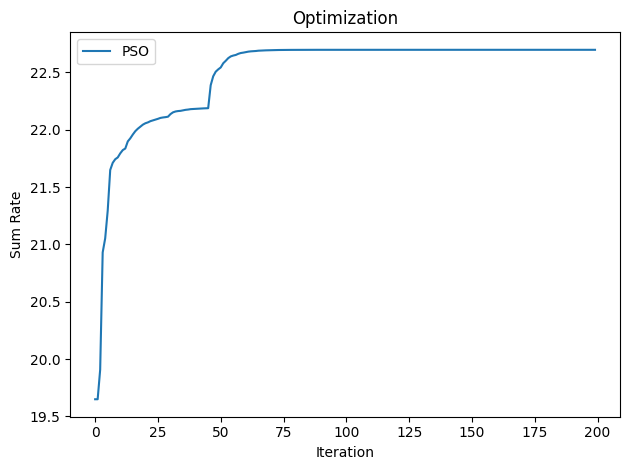

In [ ]:
plt.plot(np.arange(len(a)), a, label='PSO')
plt.title('Optimization')
plt.xlabel('Iteration')
plt.ylabel('Sum Rate')
plt.legend()
plt.tight_layout()
plt.show()